<a href="https://colab.research.google.com/github/Prava0712/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA EXPLORATION & PREPROCESSING
A data exploration and preprocessing notebook or report that analyzes the dataset, handles missing values, and prepares the data for modeling

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score,
recall_score, f1_score,
 roc_auc_score, classification_report,
confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib
from imblearn.over_sampling import SMOTE

 Load data & quick overview

Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Churn
No     5174
Yes    1869
Name: count, dtype: int64


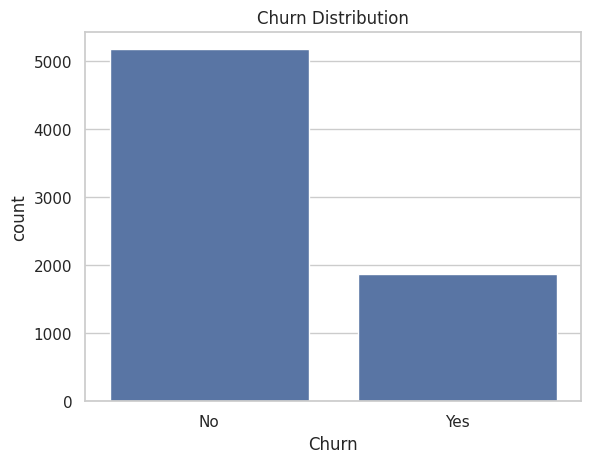

In [4]:


df = pd.read_csv("Customerdata.csv") # Assuming the file is uploaded to the Colab session's root directory
print("Shape:", df.shape)
display(df.head())
display(df.info())
display(df.describe(include='all').T)
# Target check (example: 'Churn' column with Yes/No)
# Check if 'Churn' column exists before trying to access it
if 'Churn' in df.columns:
    print(df['Churn'].value_counts(dropna=False))
    sns.countplot(x='Churn', data=df)
    plt.title('Churn Distribution')
    plt.show()
else:
    print("Column 'Churn' not found in the DataFrame. Please check the dataset columns.")

Missing values per column:
 TotalCharges    11
dtype: int64


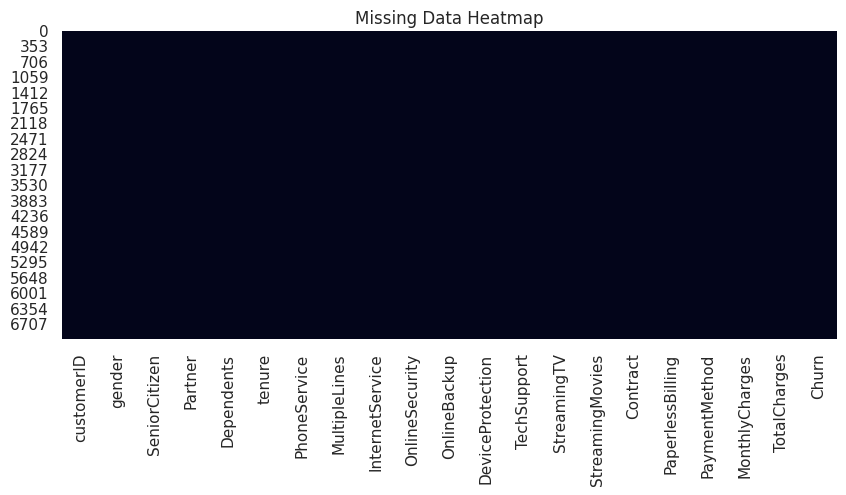

In [5]:
# Missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing[missing>0])
# Visual missingness
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Data Heatmap'); plt.show()

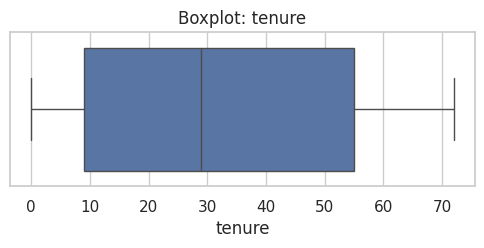

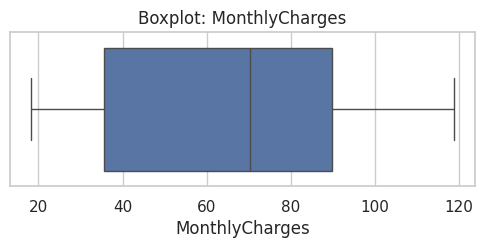

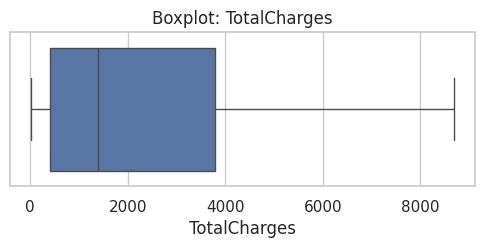

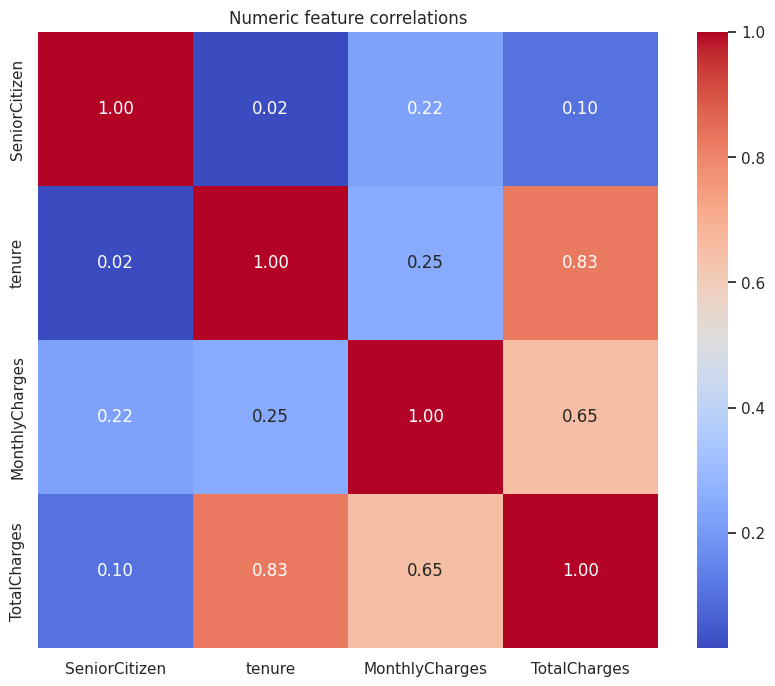

In [7]:
# Price/charge-like columns: outlier check example
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    if col in df.columns:
        plt.figure(figsize=(6,2))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot: {col}')
        plt.show()
# Correlation heatmap for numeric features
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True,
fmt=".2f", cmap='coolwarm')
plt.title('Numeric feature correlations'); plt.show()

Cleaning & Feature Engineering

In [10]:

if 'TotalCharges' in df.columns and df['TotalCharges'].dtype == 'object':
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Impute missing values
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
# remove target from cat_cols
if 'Churn' in cat_cols:
    cat_cols.remove('Churn')
    num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
df[num_cols] = pd.DataFrame(num_imputer.fit_transform(df[num_cols]),
columns=num_cols)
df[cat_cols] = pd.DataFrame(cat_imputer.fit_transform(df[cat_cols]),
columns=cat_cols)


Feature engineering examples:

In [11]:

if 'tenure' in df.columns:
 df['tenure_group'] = pd.cut(df['tenure'], bins=[-
1,3,12,24,48,120], labels=['0-3','4-12','13-24','25-48','49+'])
# Create a numeric indicator for multi-service usage example
service_cols = [c for c in df.columns if
c.lower().startswith(('internet','online','tech','stream'))]
if service_cols:
 df['num_services'] = df[service_cols].apply(lambda row:
sum(row=='Yes') if row.dtype=='O' else np.nan,
axis=1).fillna(0).astype(int)
for c in cat_cols:
 df[c] = df[c].replace(' ', np.nan).fillna(df[c].mode()[0])

A machine learning model capable of predicting customer churn

In [14]:

# Prepare X, y
target = 'Churn'
y = df[target].map({'Yes':1,'No':0}) if df[target].dtype=='object' else df[target]
X = df.drop(columns=[target])
# Identify column types for transformer
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object','category']).columns.tolist()
# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
 ('imputer', SimpleImputer(strategy='median')),
 ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
 ('imputer', SimpleImputer(strategy='most_frequent')),
 ('onehot', OneHotEncoder(handle_unknown='ignore',
sparse_output=False))
])
preprocessor = ColumnTransformer(transformers=[
 ('num', numeric_transformer, numeric_features),
 ('cat', categorical_transformer, categorical_features)
], remainder='drop')

#Train/validation/test split

In [15]:

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y,
test_size=0.20, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval,
y_trainval, test_size=0.1875, random_state=42, stratify=y_trainval)
print("Shapes -> Train:", X_train.shape, "Val:", X_val.shape, "Test:",
X_test.shape)

Shapes -> Train: (4577, 22) Val: (1057, 22) Test: (1409, 22)


We'll build pipelines that include SMOTE after preprocessing; use imblearn Pipeline

In [19]:


from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Logistic Regression (interpretable baseline)
pipe_lr = ImbPipeline(steps=[
 ('preprocessor', preprocessor),
 ('smote', smote),
 ('clf', LogisticRegression(max_iter=1000,
class_weight='balanced'))
])
pipe_lr.fit(X_train, y_train)

# Random Forest (powerful, interpretable via importances)
pipe_rf = ImbPipeline(steps=[
 ('preprocessor', preprocessor),
 ('smote', smote),
 ('clf', RandomForestClassifier(random_state=42,
class_weight='balanced', n_jobs=-1))
])
param_grid_rf = {
 'clf__n_estimators': [100, 200],
 'clf__max_depth': [None, 10, 20]
}
grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=3, scoring='f1',
n_jobs=-1)
grid_rf.fit(X_train, y_train)

# XGBoost (often best performance)
pipe_xgb = ImbPipeline(steps=[
 ('preprocessor', preprocessor),
 ('smote', smote),
 ('clf', XGBClassifier(eval_metric='logloss', random_state=42))
])
param_grid_xgb = {
 'clf__n_estimators': [100, 200],
 'clf__max_depth': [3,6]
}
grid_xgb = GridSearchCV(pipe_xgb, param_grid_xgb, cv=3, scoring='f1',
n_jobs=-1)
grid_xgb.fit(X_train, y_train)
print("Best RF params:", grid_rf.best_params_)
print("Best XGB params:", grid_xgb.best_params_)

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best RF params: {'clf__max_depth': 10, 'clf__n_estimators': 100}
Best XGB params: {'clf__max_depth': 3, 'clf__n_estimators': 100}


Model Evaluation An evaluation of model performance using appropriate metrics such as
# accuracy, precision, recall, F1 score, etc
# Utility to evaluate and print metrics

--- LogisticRegression (val) ---
Accuracy: 0.7862 Precision: 0.5754 Recall: 0.7357 F1: 0.6458 ROC-AUC: 0.8555
              precision    recall  f1-score   support

           0       0.89      0.80      0.85       777
           1       0.58      0.74      0.65       280

    accuracy                           0.79      1057
   macro avg       0.73      0.77      0.75      1057
weighted avg       0.81      0.79      0.79      1057



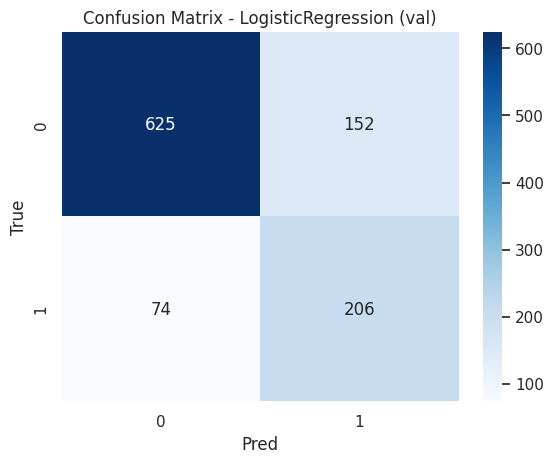

--- RandomForest (val) ---
Accuracy: 0.7711 Precision: 0.5473 Recall: 0.7857 F1: 0.6452 ROC-AUC: 0.8502
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       777
           1       0.55      0.79      0.65       280

    accuracy                           0.77      1057
   macro avg       0.73      0.78      0.74      1057
weighted avg       0.81      0.77      0.78      1057



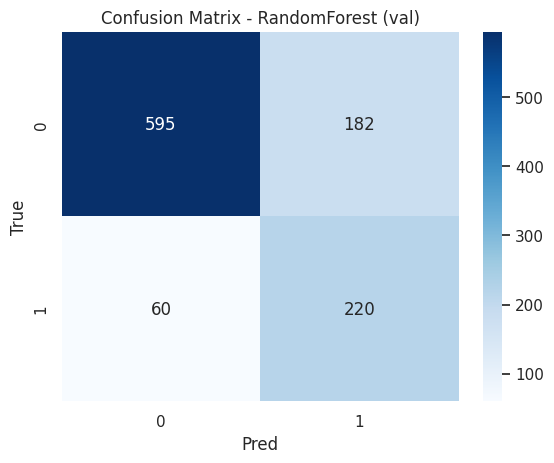

--- XGBoost (val) ---
Accuracy: 0.8165 Precision: 0.6593 Recall: 0.6357 F1: 0.6473 ROC-AUC: 0.8492
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       777
           1       0.66      0.64      0.65       280

    accuracy                           0.82      1057
   macro avg       0.76      0.76      0.76      1057
weighted avg       0.81      0.82      0.82      1057



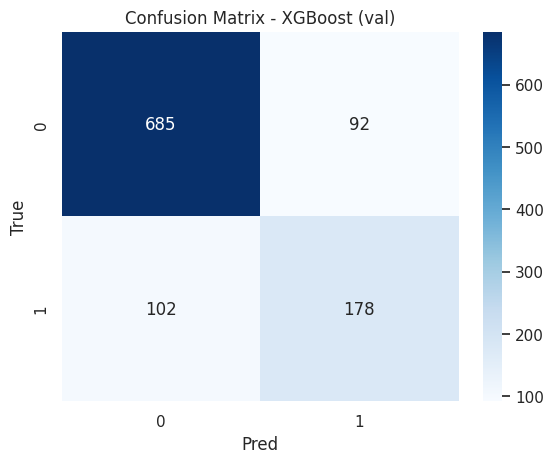

In [23]:

def evaluate_model(name, model, X, y):
    preds = model.predict(X)
    probs = model.predict_proba(X)[:,1] if hasattr(model,
    "predict_proba") else None
    acc = accuracy_score(y, preds)
    prec = precision_score(y, preds)
    rec = recall_score(y, preds)
    f1 = f1_score(y, preds)
    roc = roc_auc_score(y, probs) if probs is not None else None
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f} Precision: {prec:.4f} Recall: {rec:.4f} F1: {f1:.4f} ROC-AUC: {roc:.4f}")
    print(classification_report(y, preds))
    cm = confusion_matrix(y, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}'); plt.xlabel('Pred');
    plt.ylabel('True'); plt.show()
    return {
    'accuracy':acc,'precision':prec,'recall':rec,'f1':f1,'roc':roc}
# Evaluate on validation to choose best model
res_lr = evaluate_model("LogisticRegression (val)", pipe_lr, X_val,
y_val)
res_rf = evaluate_model("RandomForest (val)", grid_rf.best_estimator_, X_val, y_val)
res_xgb = evaluate_model("XGBoost (val)", grid_xgb.best_estimator_,
X_val, y_val)

In [24]:
val_scores = {'LR':res_lr['f1'], 'RF':res_rf['f1'],
'XGB':res_xgb['f1']}
best_key = max(val_scores, key=val_scores.get)
best_model = {'LR':pipe_lr, 'RF':grid_rf.best_estimator_,
'XGB':grid_xgb.best_estimator_}[best_key]
print("Best model selected:", best_key, "with F1:",
val_scores[best_key])


Best model selected: XGB with F1: 0.6472727272727272


--- BestModel-XGB(test) ---
Accuracy: 0.7771 Precision: 0.5773 Recall: 0.5989 F1: 0.5879 ROC-AUC: 0.8371
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1035
           1       0.58      0.60      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



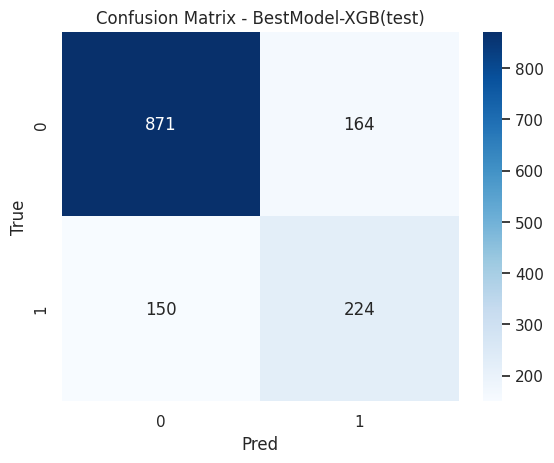

In [25]:
#Evaluate on test set
res_test = evaluate_model(f"BestModel-{best_key}(test)", best_model,
X_test, y_test)

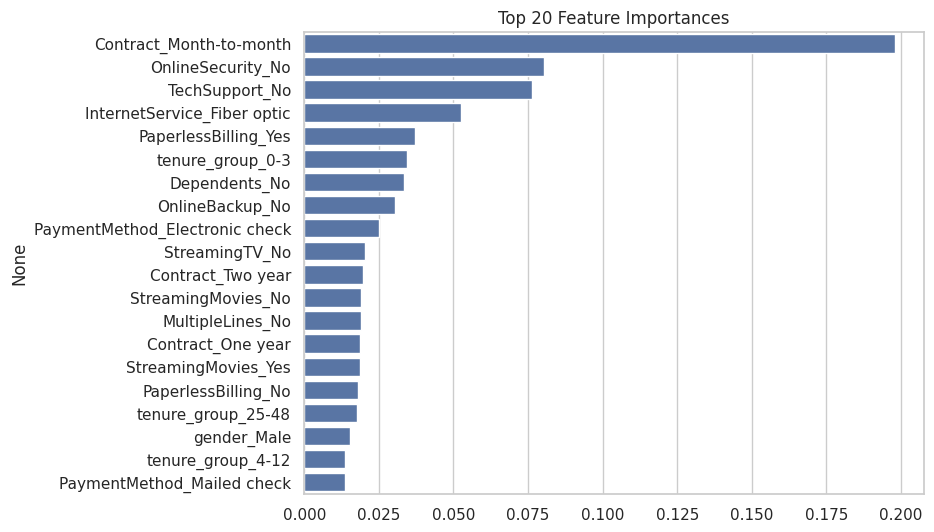

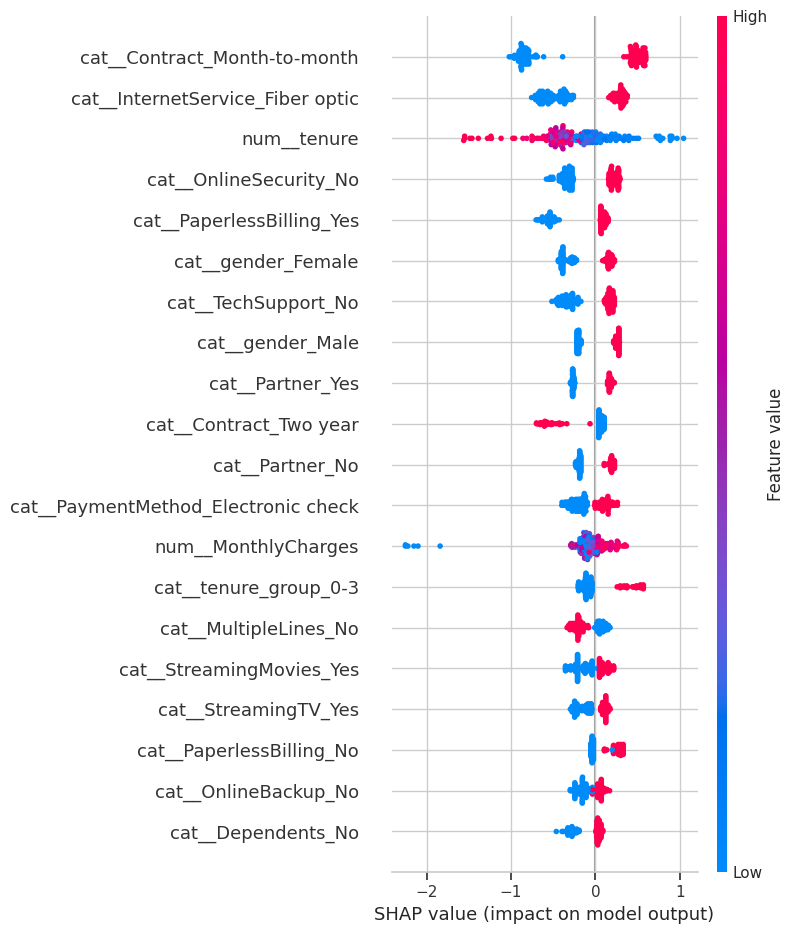

In [29]:

def get_feature_names(column_transformer):
 # numeric features
 num = column_transformer.transformers_[0][2]
 cat = column_transformer.transformers_[1][2]
 # onehot feature names
 ohe = column_transformer.named_transformers_['cat'].named_steps['onehot']
 cat_names = ohe.get_feature_names_out(column_transformer.transformers_[1][2])
 return list(num) + list(cat_names)
if best_key in ['RF','XGB']:
 # extract preprocessor from pipeline
 pre = best_model.named_steps['preprocessor']
 feat_names = list(numeric_features) + list(best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
 importances = best_model.named_steps['clf'].feature_importances_
 feat_imp = pd.Series(importances,
index=feat_names).sort_values(ascending=False).head(20)
 plt.figure(figsize=(8,6))
 sns.barplot(x=feat_imp.values, y=feat_imp.index)
 plt.title('Top 20 Feature Importances'); plt.show()

 import shap
X_background = best_model.named_steps['preprocessor'].transform(X_train.sample(200))
explainer = shap.TreeExplainer(model=best_model.named_steps['clf'])
X_to_explain = X_background
shap_values = explainer.shap_values(X_to_explain)
feat_names = best_model.named_steps['preprocessor'].get_feature_names_out()
shap.summary_plot(shap_values, X_to_explain, feature_names=feat_names)

In [30]:
# Save best model
joblib.dump(grid_rf.best_estimator_, 'best_churn_model.joblib')
# Assuming grid_rf is the best model
# Predict function for new raw dataframe (must have same columns)
def predict_new(df_new, model_path='best_churn_model.joblib'):
 model = joblib.load(model_path)
 preds = model.predict(df_new)
 # Check if the model has predict_proba before accessing it
 probs = model.predict_proba(df_new)[:,1] if hasattr(model,
'predict_proba') else None
 return preds, probs
# Example usage:
# Assuming X_test is a raw dataframe before preprocessing
new_df = X_test.iloc[[0]] # raw (not preprocessed) row
p, pr = predict_new(new_df)
print('Pred:', p, 'Prob:', pr)

Pred: [0] Prob: [0.18313382]
